In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
df = pd.read_csv('productstar_df.csv', index_col=0)
df1 = df[(df['order_state'] == 'complete')]
df1['completed_at'] = pd.to_datetime(df1['completed_at'])
df1['date'] = df1['completed_at'].dt.round('D')
df1['week'] = df1['date'] - pd.to_timedelta(df1['date'].dt.dayofweek, unit='day') 
df1['year'] = df1['date'].dt.isocalendar().year
df1['weeknum'] = df1['date'].dt.isocalendar().week
df1 = df1[(df1['date']>='2017-01-01') & (df1['date']<'2020-01-01')]

<ipython-input-1-bbb4b232b3b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['completed_at'] = pd.to_datetime(df1['completed_at'])
<ipython-input-1-bbb4b232b3b3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = df1['completed_at'].dt.round('D')
<ipython-input-1-bbb4b232b3b3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [15]:
#g = df1.groupby(['week'], as_index=False)[['store_id']].sum()

In [3]:
g2 = (df1[(df1['date']>='2017-01-01') & (df1['date']<'2018-01-01')])
g2 = df1.groupby(['weeknum', 'store_id'], as_index=False)[['item_count']].sum()

In [4]:
g3 = g2[(g2['weeknum'] == 1)]
print(g3.sort_values(by=['item_count'], ascending=False))

    weeknum  store_id  item_count
0         1        62       14697
13        1        75       10624
11        1        73       10251
1         1        63       10070
18        1        82        8971
..      ...       ...         ...
19        1        83          80
5         1        67          44
54        1       173          32
57        1       186          15
56        1       184          11

[62 rows x 3 columns]


In [2]:
import seaborn as sns

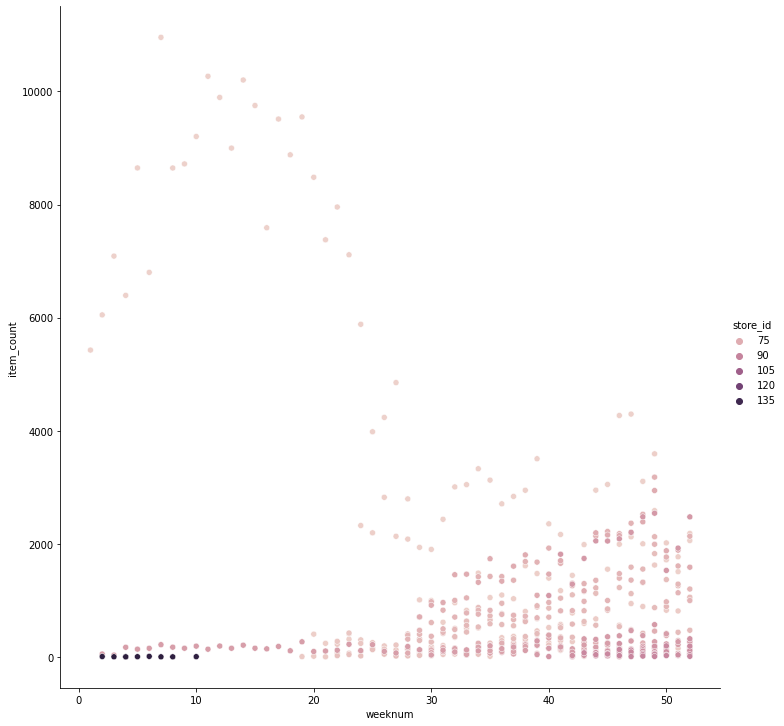

In [42]:
df_t = (df1[(df1['date']>='2017-01-01') & (df1['date']<'2018-01-01')]
            #.assign(q_orders = lambda x: 1)
            .groupby(['store_id', 'weeknum'], as_index=False)
            .sum())
            #.assign(avg_price = lambda x: x['item_total']/x['item_count'], avg_en_route = lambda x: x['days_en_route']/x['q_orders'] )),
g = sns.relplot(x = 'weeknum', y='item_count', hue='store_id', data=df_t, height=10)